# Classification on the [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset using SVM with Python's Scikit-Learn
by [Zahra Taheri](https://github.com/zahta) (26 June 2020)

### Preperation for Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/Fashion-MNIST/")==False:
  print("unzip files!")
  !unzip -q "/content/drive/My Drive/Fashion-MNIST.zip"

mypath="/content/Fashion-MNIST/"

unzip files!


In [3]:
#Define path to the directory
 
os.chdir(mypath)

print(os.getcwd())

/content/Fashion-MNIST


### Import libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

## Loading Fashion-MNIST into NumPy arrays

In [5]:
from mlxtend.data import loadlocal_mnist

#os.chdir("C:/Users/Zahra/My colab files/Fashion-MNIST/")

#load train_data and train_labels
train_data, train_labels= loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')
 
#load test_data and test_labels
test_data, test_labels= loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte', 
        labels_path='t10k-labels-idx1-ubyte')

In [6]:
print('Dimensions: %s x %s' % (train_data.shape[0], train_data.shape[1]))
#print('\n1st row', train_data[0])

Dimensions: 60000 x 784


In [7]:
print(train_data.shape)   # 28*28=784
print(train_labels.shape)

(60000, 784)
(60000,)


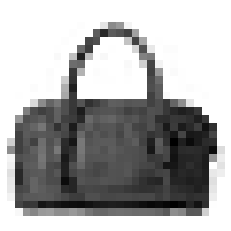

In [8]:
some_digit = train_data[11000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

## Preparation of the dataset

In [10]:
# Normalize the pixel values

def prep_pix(train, test):
    train_norm = train.astype('float32') # convert from integers to floats
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0 # normalize to range 0-1
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [11]:
X_train,X_test=prep_pix(train_data,test_data)
X_train.shape

(60000, 784)

In [12]:
y_train=train_labels
y_test=test_labels

In [13]:
# Data standardization
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

## Train and test Support vector machine models

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

In [ ]:
svm_clf1 = SVC(C=1, kernel="linear", random_state=42)
svm_clf1.fit(X_train, y_train)
y_pred = svm_clf1.predict(X_test)
print(svm_clf1.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8463


In [ ]:
svm_clf2 = SVC(C=1, kernel="poly", random_state=42)
svm_clf2.fit(X_train, y_train)
y_pred = svm_clf2.predict(X_test)
print(svm_clf2.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.863


In [ ]:
svm_clf3 = SVC(C=1, kernel="rbf", random_state=42)
svm_clf3.fit(X_train, y_train)
y_pred = svm_clf3.predict(X_test)
print(svm_clf3.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8829


In [ ]:
svm_clf4 = SVC(C=10, kernel="linear", random_state=42)
svm_clf4.fit(X_train, y_train)
y_pred = svm_clf4.predict(X_test)
print(svm_clf4.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8378


In [ ]:
svm_clf5 = SVC(C=10, kernel="poly", random_state=42)
svm_clf5.fit(X_train, y_train)
y_pred = svm_clf5.predict(X_test)
print(svm_clf5.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8808


In [ ]:
svm_clf6 = SVC(C=10, kernel="rbf", random_state=42)
svm_clf6.fit(X_train, y_train)
y_pred = svm_clf6.predict(X_test)
print(svm_clf6.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.9002


##  With Principal Component Analysis (PCA)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
X_train.shape

(60000, 187)

In [ ]:
svm_clf1 = SVC(C=1, kernel="linear", random_state=42)
svm_clf1.fit(X_train, y_train)
y_pred = svm_clf1.predict(X_test)
print(svm_clf1.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.853


In [ ]:
svm_clf2 = SVC(C=1, kernel="poly", random_state=42)
svm_clf2.fit(X_train, y_train)
y_pred = svm_clf2.predict(X_test)
print(svm_clf2.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8804


In [ ]:
svm_clf3 = SVC(C=1, kernel="rbf", random_state=42)
svm_clf3.fit(X_train, y_train)
y_pred = svm_clf3.predict(X_test)
print(svm_clf3.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.886


In [ ]:
svm_clf4 = SVC(C=10, kernel="linear", random_state=42)
svm_clf4.fit(X_train, y_train)
y_pred = svm_clf4.predict(X_test)
print(svm_clf4.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.852


In [17]:
svm_clf5 = SVC(C=10, kernel="poly", random_state=42)
svm_clf5.fit(X_train, y_train)
y_pred = svm_clf5.predict(X_test)
print(svm_clf5.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8976


In [18]:
svm_clf6 = SVC(C=10, kernel="rbf", random_state=42)
svm_clf6.fit(X_train, y_train)
y_pred = svm_clf6.predict(X_test)
print(svm_clf6.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.902


In [19]:
svm_clf7 = SVC(C=0.1, kernel="linear", random_state=42)
svm_clf7.fit(X_train, y_train)
y_pred = svm_clf7.predict(X_test)
print(svm_clf7.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.8561
